### Collection of convenient methods and examples for plotting nice charts
Plotting nice charts in notebook can be time-consuming for novice Python users. You need to remember all the syntax for setting the style, custom labels, where to place the legend, etc., and you need to manipulate your data to get what you want. 
          
Here, I'm trying to write some simple wrappers around existing plotting functions in Pandas, Seaborn, etc., and simplify the function definition with only the most commonly used parameters.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cycler
from matplotlib.ticker import FuncFormatter
%matplotlib inline

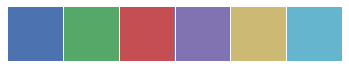

In [2]:
# default seaborn palette
current_palette = sns.color_palette()
sns.palplot(current_palette)

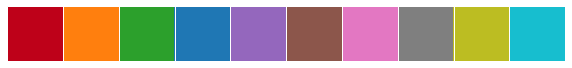

In [3]:
# Color scheme 1: cetegorical. modified from cat10 (d3). 
# Change the sequence depending on what you want as the default first few colors on your chart. 
# Here the default is set to scarlet red.
cat10_palette = sns.color_palette(['#be0119', '#ff7f0e', '#2ca02c', '#1f77b4', '#9467bd', 
                 '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'])
sns.palplot(cat10_palette)

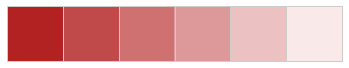

In [72]:
# Color scheme 2: sequential
red_palette = sns.light_palette("firebrick", reverse=True)
sns.palplot(red_palette)

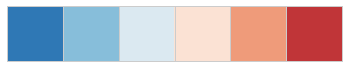

In [75]:
# color scheme 3: diverging
RdBu_r_palette = sns.color_palette("RdBu_r", 6)
sns.palplot(RdBu_r_palette)

In [6]:
sns.set_style('whitegrid')
sns.set_palette(cat10_palette)
# sns.set_palette(RdBu_r_palette)
# sns.set_palette(red_palette)

In [5]:
df = pd.read_csv("../data/titanic.csv")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [7]:
def plot_hist(data, ax=None, x_label=None, y_label=None, title=None, 
              lb=None, ub=None, bins=50, log_x=False, figsize=(6, 4)):
    """
    Plots a histogram using matplotlib's histogram plotting
    
    Parameters
    ----------
    data: pandas series, list of series or df
    ax: if provided, plot on this axis
    x_label, y_label: x and y axis labels
    title: title of chart
    lb, ub: lower bound and upper bound of data to be plotted. This is a global filter applied to all columns.
    bins: number of bins in histogram
    log_x: boolean. whether to use log spaced bins
    figsize: tuple. size of the chart
    """
# TODO: handle when data = list of series or df
#     if isinstance(data, pd.Series):
#         data = pd.DataFrame(data)
#     elif isinstance(data, list):
#         data = pd.DataFrame(data).T
#     for col in data.columns:
#         s = data[col]
    s = data.dropna()
        
    if lb is not None:
        s = s[(s > lb)]
    if ub is not None:
        s = s[(s < ub)]
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    if log_x == True:
        if (s <= 0).sum() > 0:
            raise ValueError('To use log scale, all values need to be positive') 
#         s = np.log10(s)
        bins = np.logspace(np.log10(s.min()), np.log10(s.max()), bins)
        plt.xscale('log')
        
    ax.hist(s, bins=bins)
    
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title('Histogram')
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
        
#     if log_x == True:
#         def format_fn(tick_val, tick_pos):
#             return 10**tick_val
#         ax.xaxis.set_major_formatter(FuncFormatter(format_fn))

        
# cumulative fraction plot (ECDF)
def plot_fraction(s, x_percentage=False, x_cumulative=False, ax=None, x_label=None, y_label=None, title=None, 
              lb=None, ub=None, bins=50, figsize=(6, 4)):
    """
    Plots a cumulative fraction plot
    
    Parameters
    ----------
    s: pandas series
    x_percentage: boolean. If True, show x values as percentage instead of actual values
    x_cumulative: boolean. If True, show cumulative x values
    ax: if provided, plot on this axis
    x_label, y_label: x and y axis labels
    title: title of chart
    lb, ub: lower bound and upper bound of data to be plotted
    bins: number of bins in histogram
    figsize: tuple. size of the chart
    """
    from statsmodels.distributions.empirical_distribution import ECDF
    
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)
    
    ecdf = ECDF(df.fare)
    x = ecdf.x
    y = ecdf.y
    
    if x_cumulative == True:
        x[np.isneginf(x)] = 0
        x = x.cumsum()
    if x_percentage == True:
        x = x/x.max()
    
    ax.plot(x, y)
    if title is not None:
        ax.set_title(title)
    else:
        ax.set_title('Cumulative Fraction Plot')
    if x_label is not None:
        ax.set_xlabel(x_label)
    if y_label is not None:
        ax.set_ylabel(y_label)
        
#     if annotate_x is None:
#         ax.axvline(100, ymin=0, ymax=0.8)
    return ax

def plot_bar_ratio(df, by, cols=None):
    """
    Shows relative contribution (sum) of each group in each dimension
    
    Parameters
    ----------
    df: dataframe to plot
    by: str. column to group by
    cols: list of str. selected columns to plot.
    """
    if cols is not None:
        df = df[cols + [by]]
    tdf = df.groupby(by).sum()
    tdf = tdf / tdf.sum(axis=0)
    tdf.T.plot.barh(stacked=True)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.) #places legend outside on the right

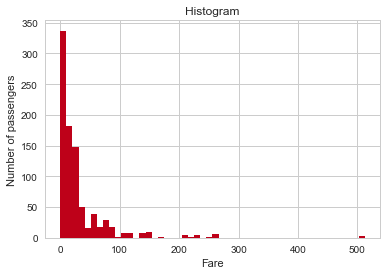

In [177]:
plot_hist(df.fare, x_label='Fare', y_label='Number of passengers')

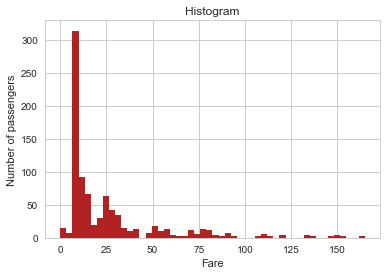

In [56]:
plot_hist(df.fare, x_label='Fare', y_label='Number of passengers', ub=200)

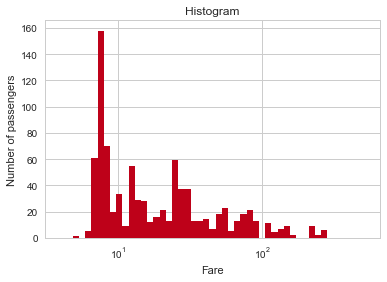

In [7]:
plot_hist(df.fare[df.fare > 0], x_label='Fare', y_label='Number of passengers', log_x=True)

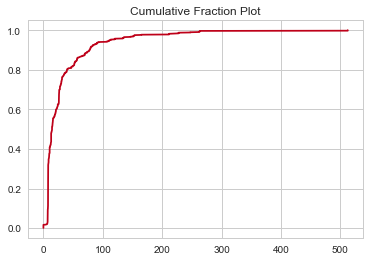

In [8]:
plot_fraction(df.fare)

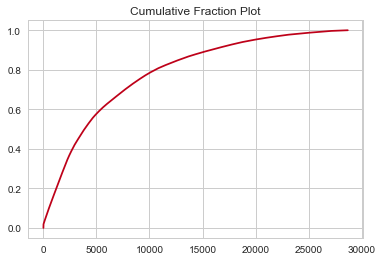

In [9]:
plot_fraction(df.fare, x_cumulative=True)

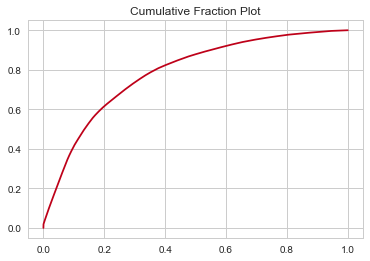

In [130]:
plot_fraction(df.fare, x_cumulative=True, x_percentage=True)

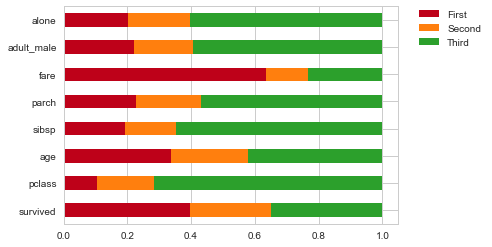

In [79]:
plot_bar_ratio(df, by='class')

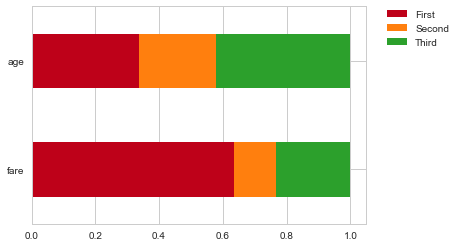

In [80]:
plot_bar_ratio(df, by='class', cols=['fare', 'age'])

In [167]:
# plotting multiple charts
def plot_grid(nrows, ncols, figsize=(16, 4)):
    """
    plotting charts in m x n grids
    
    Not very useful...
    ----------
    
    """
    fig, axes = plt.subplots(nrows, ncols, figsize=figsize)
    return axes.ravel()

if you want to plot multiple charts in a m by n grid, you can call plot_grid(m, n) first, which will give you a list of axes. Then you can call the plot function one by one, passing axes[i] parameter to each plot. This is useful when you need to plot charts of different kind or differnt settings.

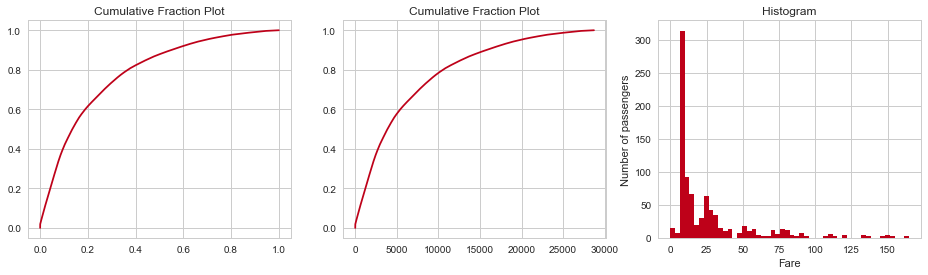

In [180]:
axes = plot_grid(1,3)
plot_fraction(df.fare, x_cumulative=True, x_percentage=True, ax=axes[0])
plot_fraction(df.fare, x_cumulative=True, x_percentage=False, ax=axes[1])
plot_hist(df.fare, x_label='Fare', y_label='Number of passengers', ub=200, ax=axes[2])

If the you want to plot same kind of chart for multiple columns (e.g. histogram of each column), you can pass a dataframe or list of dataframe to plot_hist(), but the parameters such as lb, ub will be shared across all charts.

### References

Placement of legend
![](../img/ref/legend_placement.png)